# Introduction to Robotics 
Instructor: **Voeurn Yong Ann**


**Background**:



*   Ufa state aviation technical university (Bsc. Mechatronics and Robotics, profile: Industrail robotics, 2018), 
*   Innopolis University,(Master of Computer Science, profile: Robotics and computer vision, 2019-2021) 
*   Daegu Gyeongbuk Institute of Science and Technology (DGIST),(PhD of Robotics engineer, profile:legged robotics in medical application, 2021(*Temporery withdrawal*) 


**Research interests**:
*   Control: Nonlinear, Robust, Adaptive, Energy based, Noncolocated and Underactuated, with focus on discrete-time and physically inspired numerical methods.
*   Applied Optimization: Linear, Quadratic, and Nonlinear programming, Dynamical programming, Optimal Control
*   Legged robot/Humanoid robot: Walking, foot step, trajectory planing 


If you face any problems with the course or would like to do research and work on hardware. Feel free to contact me via telegram `@yongann` or email:(y.voeurn@innoplis.univerisity or yongann@armrobotics.io) i


**Notation**

1.   *CLASS EXERCISE*: These exercises we will do together during the practice sessions and discuss the results
2.   *HW EXERCISE*: This is home assignment which I strongly recommend to complete right after the class.

*You have to create a repository of your works then share the link to submit your work at Moodle.*


***Plagiarism** will result in a zero score for the submitted assignment/exam/project.




# LAB2: Foward Kinematics


**Goals for today**
During today practice we will:

*   Kinematics Chain 
*   Forward kinematics
*   URDF
*   Denavit Hartenberg

**Class Excercise**: 

Excercise 1 : Foward Kinematics 

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1nW9EoufpRs15Lv3joMrzlJQahnQbQ4D3" align="center" hspace="350px" vspace="0px"></p>


1. Calculate Foward kinematics using geometrical approach 
2. Implement the your result 
3. Find the end effector position of d1*=0.5m, $θ_1$= 45, d3* = 2m




In [ ]:
import numpy as np

d2=1

H=np.array([(d2+2)*np.cos(np.pi/4), (d2+2)*np.sin(np.pi/4), 0.5])

print(H)


[2.12132034 2.12132034 0.5       ]


In [ ]:
# your code here 

[[-0.44807362 -0.89399666  0.        ]
 [ 0.89399666 -0.44807362  0.        ]
 [ 0.          0.          0.        ]]


Excercise 2 : 
 

1.   Define the homogeneous transformation matrix of a RRR articulate Robot(fig. below) 
2. Implement your result analytical solution 
3. Find tool pose(position and oriantation) at q = (0,90,45)






<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=11h-RN2gfctvCXUubLZtMtYzFSSIx0Wag" align="center" hspace="350px" vspace="0px"></p>


In [ ]:
import numpy as np

def rotz(phi):
  Rz=np.array([[np.cos(phi), -np.sin(phi), 0, 0], [np.sin(phi), np.cos(phi), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
  return Rz

def roty(x):
  Ry=np.array([[np.cos(x), 0, np.sin(x), 0], [0, 1, 0, 0], [-np.sin(x), 0, np.cos(x), 0], [0, 0, 0, 1]])
  return Ry

def trans(x):
  H1=np.array([[1, 0, 0, x[0]], [0, 1, 0, x[1]], [0, 0, 1, x[2]], [0, 0, 0, 1]])
  return H1

x1=[0, 0, 2]
x2=[2, 0, 0]
x3=[2, 0, 0]

H2=np.dot(rotz(0),np.dot(trans(x1),np.dot(roty(-np.pi/2),np.dot(trans(x2),np.dot(roty(-np.pi/4),trans(x3))))))

print(H2)


[[-0.70710678  0.         -0.70710678 -1.41421356]
 [ 0.          1.          0.          0.        ]
 [ 0.70710678  0.         -0.70710678  5.41421356]
 [ 0.          0.          0.          1.        ]]


**Class Excercise 3** : 

4. Define DH table of RRR articulate Robot(fig. 3.27)
5. Implement your result from DH table 
6. Find tool pose(position and oriantation) at q = (30,45,45)


<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=11h-RN2gfctvCXUubLZtMtYzFSSIx0Wag" align="center" hspace="350px" vspace="0px"></p>


In [ ]:
import numpy as np

def hartenberg(r_n, d_n, theta_n, alpha_n):
  H=np.array([[np.cos(theta_n), -np.sin(theta_n)*np.cos(alpha_n), np.sin(theta_n)*np.sin(alpha_n), r_n*np.cos(theta_n)], [np.sin(theta_n), np.cos(theta_n)*np.cos(alpha_n), -np.cos(theta_n)*np.sin(alpha_n), r_n*np.sin(theta_n)], [0, np.sin(alpha_n), np.cos(alpha_n), d_n], [0, 0, 0, 1]])
  return H

H1=hartenberg(0, 2, np.pi/4, -np.pi/2)
H2=hartenberg(2,0, np.pi/4, 0)
H3=hartenberg(2, 0, np.pi/4, 0)
H=np.dot(H1, np.dot(H2, H3))

print(H)


[[ 9.78926560e-17 -7.07106781e-01 -7.07106781e-01  1.00000000e+00]
 [ 1.84488262e-16 -7.07106781e-01  7.07106781e-01  1.00000000e+00]
 [-1.00000000e+00 -1.79380389e-16  6.12323400e-17 -1.41421356e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


**Class Excercise** : 

URDF: http://www.mymodelrobot.appspot.com/









**HW Excercise 1** (30 pts): 



<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1jjAQ1it7MeCk0E85wTNSL0hN1MtFCcPe" align="center" hspace="350px" vspace="0px"></p>


1. Calculate Foward kinematics using geometrical approach where L1= 1 m, L2 = 0.3, L3=0.5
2. Implement the your result 
3. find tool coordinate (θ1 = 45; D2= 0.1;θ3 = 30)




**Answer 1.**
$H=H1*H2*H3$
with the following table:

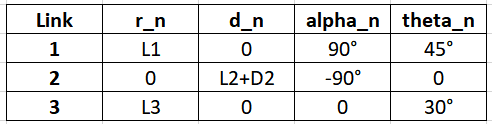

In fact, to explain a bit more, for the first link, I considered that alpha was positive and with 90° as z0 is upwards and z1 is the axis of sliding, horizontal.
Then theta0 is just the rotation, d_n is the sliding on z so 0 and r_n is the sliding in x, I put the length of Link1 so L1.

For the second, I used -90° for alpha as we reverse the rotation of z axis from z1 to z2 compared to z0-z1. theta is null as there is no rotation. d_n is d2+L2 as there is the link length and the displacement on the axis combined. r_n is 0 as we only slide one way with no rotation.

Finally for the last link, we have alpha to be 0 as we just slide to the end-hand effector. theta is theta3 the rotation, d_n is sliding in z so 0. And then, r_n is the sliding in length in x axis so L3.

In [2]:
import numpy as np

def hartenberg(r_n, d_n, theta_n, alpha_n):
  H=np.array([[np.cos(theta_n), -np.sin(theta_n)*np.cos(alpha_n), np.sin(theta_n)*np.sin(alpha_n), r_n*np.cos(theta_n)], [np.sin(theta_n), np.cos(theta_n)*np.cos(alpha_n), -np.cos(theta_n)*np.sin(alpha_n), r_n*np.sin(theta_n)], [0, np.sin(alpha_n), np.cos(alpha_n), d_n], [0, 0, 0, 1]])
  return H

D2=0.1
L2=0.3
displacement=D2+L2

H1=hartenberg(1, 0, np.pi/4, np.pi/2)
H2=hartenberg(0, displacement, 0, -np.pi/2)
H3=hartenberg(0.5, 0, np.pi/6, 0)

H=np.dot(H1, np.dot(H2, H3))
print(H)

[[ 2.58819045e-01 -9.65925826e-01  3.01573569e-33  1.11935902e+00]
 [ 9.65925826e-01  2.58819045e-01  2.51206059e-33  9.07226982e-01]
 [-2.76389814e-33 -2.76012034e-33  1.00000000e+00  2.44929360e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


**HW Excercise 2** (30 pts): 
 

1.   Define the homogeneous transformation matrix of a Universal Robot(fig. below) (whichever we want for the initial) - UR 10 Datasheet
2. Implement your result analytical solution 
3. Find tool pose(position and orientation) at q = (0,90,45,0,45,0)





<p><img alt="mbk" height="250px" src="https://asd.sutd.edu.sg/dfab/wp-content/uploads/2014/07/ur10-11.png" align="center" hspace="350px" vspace="0px"></p>

**Answer 2.**
1. I took the datasheet for DR10 on the internet for lengths.

The scheme i thought about goes like this :
Rz (base), Tz (to the next joint), Rx (about x), Tz (go to the elbow from the shoulder), Rx (rotatio about the elbow x), Tz (go to the wrist 1 from elbow), Rx (rotate wrist 1), Tx (translate x to the wrist 2), Rz (rotate wrist 2), Tz (go to wrist 3), Rx (wrist 3 rotation), Tx (end hand effector)

.

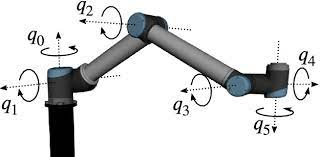

In [7]:
import numpy as np

def rotz(x):
  Rz=np.array([[np.cos(x), -np.sin(x), 0, 0], [np.sin(x), np.cos(x), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
  return Rz

def roty(x):
  Ry=np.array([[np.cos(x), 0, np.sin(x), 0], [0, 1, 0, 0], [-np.sin(x), 0, np.cos(x), 0], [0, 0, 0, 1]])
  return Ry

def rotx(x):
  Ry=np.array([[1, 0, 0, 0], [0, np.cos(x), -np.sin(x), 0], [0, np.sin(x), np.cos(x), 0], [0, 0, 0, 1]])
  return Ry

def trans(x):
  H1=np.array([[1, 0, 0, x[0]], [0, 1, 0, x[1]], [0, 0, 1, x[2]], [0, 0, 0, 1]])
  return H1

L1=128
L2=612.7
L3=571.6
L4=163.9
L5=115.7
L6=92.2

x1=[0, 0, L1]
x2=[0, 0, L2]
x3=[0, 0, L3]
x4=[L4, 0, 0]
x5=[0, 0, L5]
x6=[L6, 0, 0]

T=np.dot(rotz(0), np.dot(trans(x1), np.dot(rotx(np.pi/2), np.dot(trans(x2), np.dot(rotx(np.pi/4), np.dot(trans(x3), np.dot(rotx(0), np.dot(trans(x4), np.dot(rotz(np.pi/4), np.dot(trans(x5), np.dot(rotx(0), trans(x6))))))))))))

print(T)

[[ 7.07106781e-01 -7.07106781e-01  0.00000000e+00  2.29095245e+02]
 [-5.00000000e-01 -5.00000000e-01 -7.07106781e-01 -1.14479449e+03]
 [ 5.00000000e-01  5.00000000e-01 -7.07106781e-01 -3.11894491e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


**HW Excercise 3** (40 pts): 

4. Define DH table 
5. Implement your result from DH table 
6. Find tool pose(position and orientation) at q = (0,90,45,0,45, 0) and compare the result 
7. give the conclusion of comparation between analytical approach and DH 

**Answer 3.**

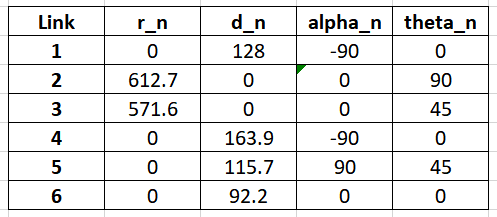

In [3]:
import numpy as np

def hartenberg(r_n, d_n, theta_n, alpha_n):
  H=np.array([[np.cos(theta_n), -np.sin(theta_n)*np.cos(alpha_n), np.sin(theta_n)*np.sin(alpha_n), r_n*np.cos(theta_n)], [np.sin(theta_n), np.cos(theta_n)*np.cos(alpha_n), -np.cos(theta_n)*np.sin(alpha_n), r_n*np.sin(theta_n)], [0, np.sin(alpha_n), np.cos(alpha_n), d_n], [0, 0, 0, 1]])
  return H

H1=hartenberg(0, 128, 0, -np.pi/2)
H2=hartenberg(612.7, 0, np.pi/2, 0)
H3=hartenberg(571.6, 0, np.pi/4, 0)
H4=hartenberg(0, 163.9, 0, -np.pi/2)
H5=hartenberg(0, 115.7, np.pi/4, np.pi/2)
H6=hartenberg(0, 92.2, 0, 0)

H=np.dot(H1, np.dot(H2, np.dot(H3, np.dot(H4, np.dot(H5, H6)))))
print(H)

[[-5.00000000e-01 -7.07106781e-01 -5.00000000e-01 -5.32094491e+02]
 [-7.07106781e-01 -2.53632657e-17  7.07106781e-01  2.29095245e+02]
 [-5.00000000e-01  7.07106781e-01 -5.00000000e-01 -8.53169982e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Except for the translations, the rotations are the same (maybe not in the same place, but same values), which means I just didn't take the same axis definition I believe.
I believe the Denavite-Hartenberg is faster, and easier, leading to less possibilities for mistakes. 
For the first way, it was way harder to combine all the translations and the rotations and it may have lead me to mistakes in the calculations or definitions of axes.